<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/PCA_ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

Adapted from The E-Learning project SOGA-Py was developed at the Department of Earth Sciences by Annette Rudolph, Joachim Krois and Kai Hartmann. You can reach us via mail by soga[at]zedat.fu-berlin.de.

Let us consider a problem with m observations/measurements on a set of n variables,
$$x_1, x_2,...,x_n$$

If n is a high number, exploratory data analysis becomes challenging, as for example our ability to visualize data is limited to 2 or 3 dimensions. We may explore the data set by examining two-dimensional scatter plots, each of which contains m observations and two of the n variables. However, there are
$$\binom{n}{2}= n(n-1)/2 $$ such scatter plots. If a data set has
$$n= 15$$
variables there are 105 plots to draw! Moreover, it is very likely that none of them will be informative since they each contain just a small fraction of the total information present in the data set. Hence, we are looking for a low-dimensional (d≪n) representation of the data that captures as much of the information as possible.

Besides exploratory data analysis dimensionality reduction becomes important, if the features of a given data set are redundant. or, in other words, if they are highly correlated ([multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity)). Multicollinearity is a problem because it causes instability in regression models. The redundant information inflates the variance of the parameter estimates which can cause them to be statistically insignificant when they would have been significant otherwise. Hence, we are looking for a low-dimensional representation of the data, where the features are uncorrelated with one another.

One technique that provides such a dimensionality reduction is [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis), which projects a high-dimensional variable space onto a new feature space. The original explanatory variables are replaced with new variables (features), derived from the original ones, that are by design uncorrelated with one another, thus eliminating the redundancy.

The main idea behind PCA is that not all of the n dimensions of the original data set are equally informative, where the concept of being informative is measured by the variability along each particular variable space dimension, also denoted as variance. More precisely, PCA finds the directions of maximum variance in high-dimensional data and projects it onto a smaller dimensional subspace while retaining the main information. Each of the dimensions found by PCA is effectively a linear combination of the n variables.

# Principal Component Analysis - the basics
Principal component analysis (PCA) allows us to summarize a set of variables with a smaller number of representative features that collectively explain most of the variability in the original data set. PCA projects the observations described by n variables into **orthogonal**, and thus by definition **uncorrelated**, features/variables. The new set of synthetic variables is equal in number to the original set. However, the first synthetic variable represents as much of the common variation of the original variables as possible, the second variable represents as much of the residual variation as possible, and so forth.

PCA is particularly powerful in dealing with multicollinearity and observations that outnumber the variables (m>n), and it is widely used for explanatory data analysis, outlier detection and as a data pre-processing technique for predictive modelling. The figure below outlines the analysis workflow.

In predictive modelling PCA is particular useful as a data pre-processing technique. PCA serves as a tool for exploratory data analysis and outlier detection, but as well for dimensionality reduction when the number of variables outnumbers the sample size (d>n). Beyond that PCA is often applied on data sets with highly redundant variables, or in other words of highly correlated variables (problem of multicollinearity). Multicollinearity is a problem because it causes instability in regression models. The redundant information inflates the variance of the parameter estimates which can cause them to be statistically insignificant when they would have been significant otherwise.



Let's  look more into detail using an example. First, we load the libraries we need for further analysis

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Loading Data and Data preparation

To procceed a PCA on a given data set, we will first take a look at the data set. In this section we analyse the food texture data set. This open source data set is available here and describes texture measurements of a pastry-type food.

In [2]:
food = pd.read_csv("https://userpage.fu-berlin.de/soga/data/raw-data/food-texture.csv")
# exclude first column
food = food.iloc[:, 1:]
food.head()

,Oil,Density,Crispy,Fracture,Hardness
0,16.5,2955,10,23,97
1,17.7,2660,14,9,139
2,16.2,2870,12,17,143
3,16.7,2920,10,31,95
4,16.3,2975,11,26,143


The data set consists of 50 rows (observations) and 6 columns (features/variables). The features are:

- Oil: percentage oil in the pastry
- Density: the product’s density (the higher the number, the more dense the product)
- Crispy: a crispiness measurement, on a scale from 7 to 15, with 15 being more crispy.
- Fracture: the angle, in degrees, through which the pasty can be slowly bent before it fractures.
- Hardness: a sharp point is used to measure the amount of force required before breakage occurs.

For the sake of comprehensibility we start working with a reduced, two-dimensional toy data set, by extracting the columns Oil and Density. Later we return to the full data set for our analyses.

In [3]:
pca_toy = food[["Oil", "Density"]]
pca_toy.head()

,Oil,Density
0,16.5,2955
1,17.7,2660
2,16.2,2870
3,16.7,2920
4,16.3,2975


We start with an exploratory data analysis and examine a scatter plot.


<Axes: xlabel='Oil', ylabel='Density'>

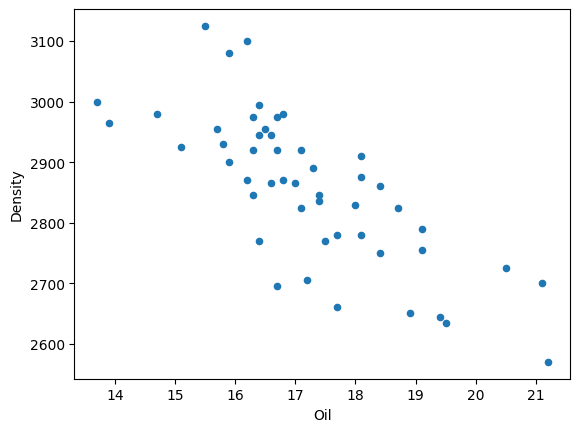

In [4]:
pca_toy.plot.scatter(x='Oil',y='Density')

In [5]:
scaler = StandardScaler().fit(pca_toy)
pca_toy_standard = pca_toy.copy()
pca_toy_standard[["Oil", "Density"]] = scaler.transform(pca_toy)
pca_toy_standard.head()

,Oil,Density
0,-0.445430,0.790272
1,0.315989,-1.603262
2,-0.635784,0.100610
3,-0.318527,0.506293
4,-0.572333,0.952546



## Scale the data
The scatter plot above indicates a relationship between the feature Oil and the feature Density. Note that the variables are not on the same scale. In general, the results of PCA depend on the scale of the variables. Therefore, each variable is typically centered and scaled to have a mean of zero and standard deviation of one. In certain settings, however, the variables are measured in the same units, and one may skip the standardization.

For the sake of comprehensibility we use the `StandardScaler` of scikit-learn and visualize the effects of each pre-processing step. The goal is to center each column to zero mean and then scale it to have unit variance.



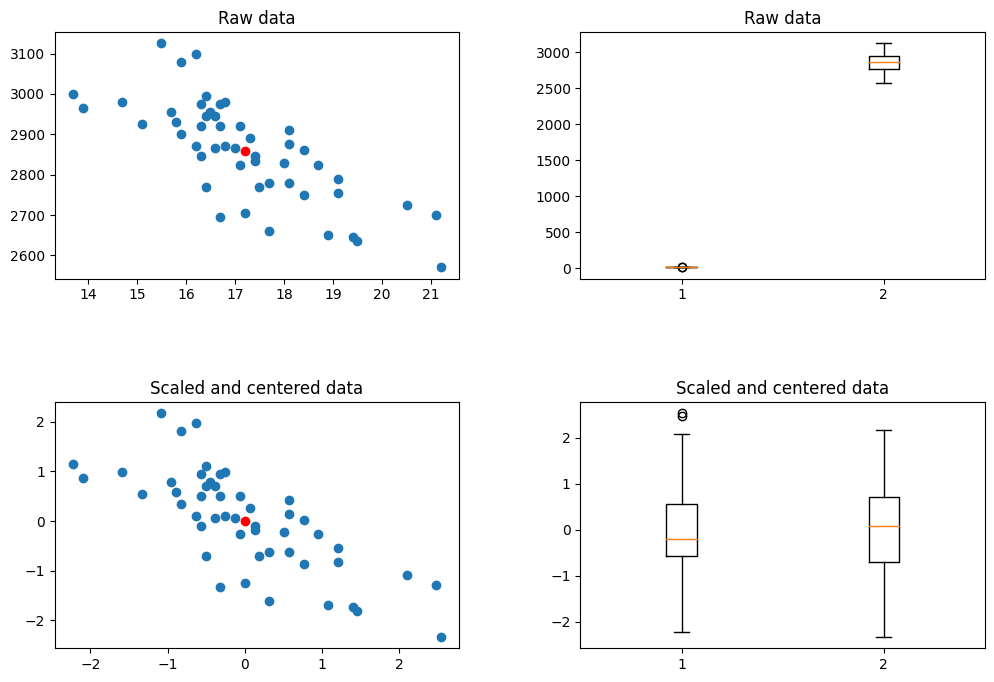

In [ ]:
# Set figure properties
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.ravel()

# Scatterplot 1
axs[0].scatter(pca_toy[["Oil"]], pca_toy[["Density"]])
axs[0].set_title("Raw data")
data_mean = np.mean(pca_toy, axis=0)
axs[0].scatter(data_mean[0], data_mean[1], color="red", marker="o")  # mark mean
# Boxplot 1
axs[1].boxplot(pca_toy)
axs[1].set_title("Raw data")

# Scatterplot 2
axs[2].scatter(pca_toy_standard[["Oil"]], pca_toy_standard[["Density"]])
axs[2].set_title("Scaled and centered data")
data_mean = np.mean(pca_toy_standard, axis=0)
axs[2].scatter(data_mean[0], data_mean[1], color="red", marker="o")  # mark mean
# Boxplot 3
axs[3].boxplot(pca_toy_standard)
axs[3].set_title("Scaled and centered data")

# Assign pre-processed dataset to a new variable
pca_toy_data = pca_toy_standard.reset_index()

# save for later usage
pca_toy_data.to_feather("pca_food_toy_30300.feather")

Let's go back to the full matrix

# Performing a PCA


Here we use StandardScaler instead to center and scale the data.

In [7]:
scaler = StandardScaler().fit(food)
food_scaled = scaler.transform(food)
food_scaled=pd.DataFrame(food_scaled,columns=food.columns)
food_scaled.head()

,Oil,Density,Crispy,Fracture,Hardness
0,-0.445430,0.790272,-0.864754,0.395481,-1.011854
1,0.315989,-1.603262,1.410914,-2.191776,0.351131
2,-0.635784,0.100610,0.273080,-0.713344,0.480939
3,-0.318527,0.506293,-0.864754,1.873913,-1.076758
4,-0.572333,0.952546,-0.295837,0.949893,0.480939


Let's look at the data. A simple way to this is to use seaborn and the pairplot function.

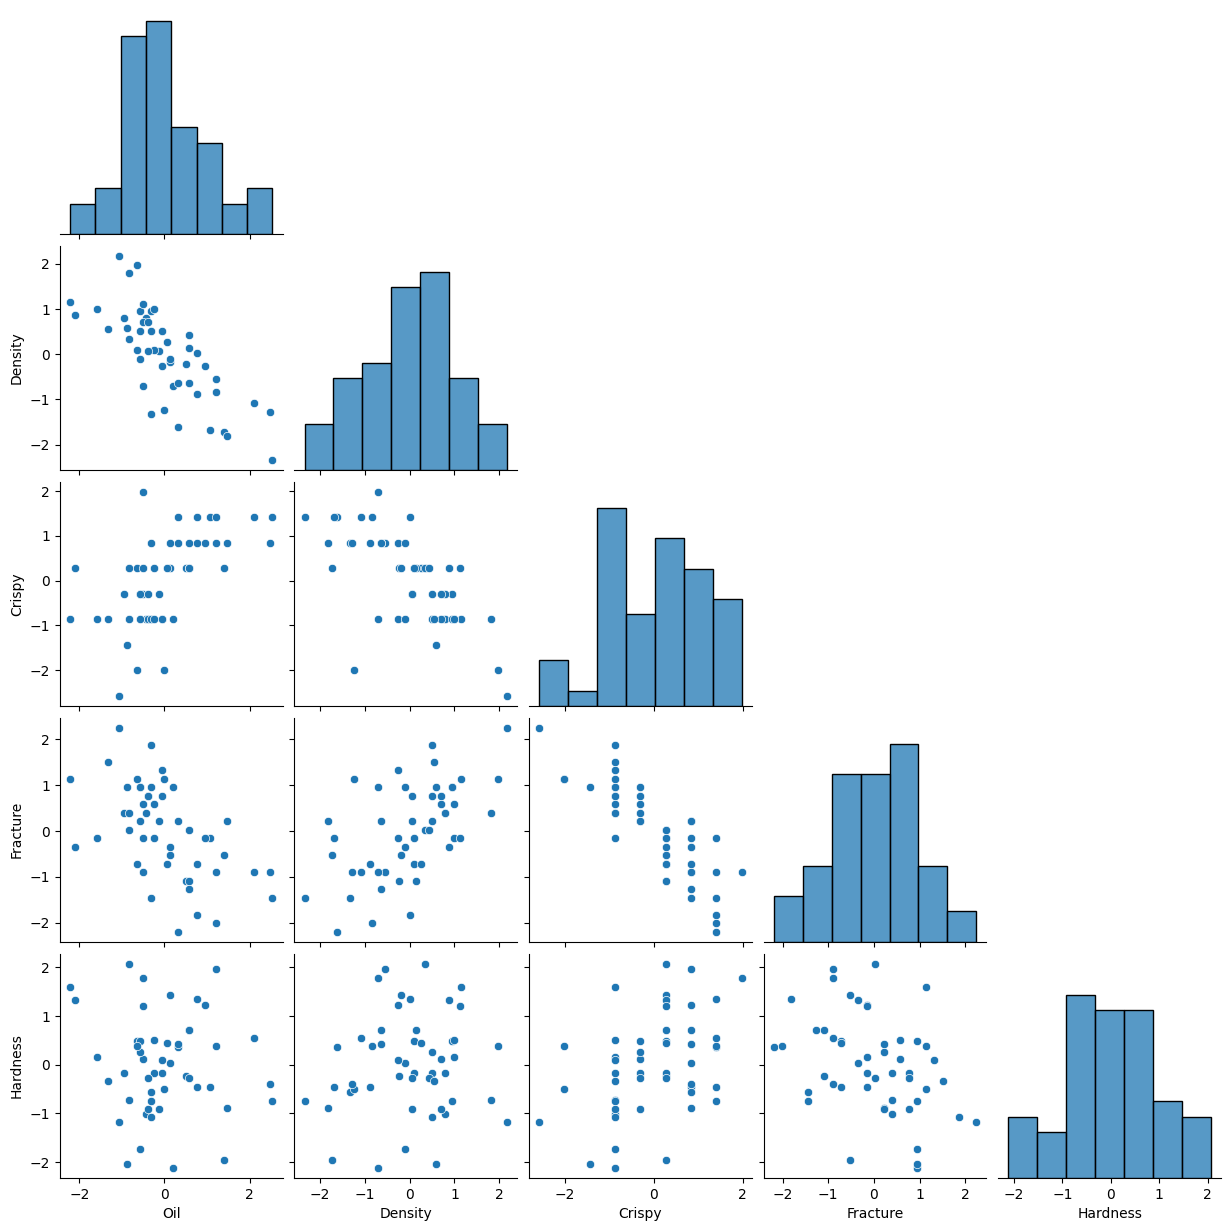

In [9]:
import seaborn as sns
sns.pairplot(food_scaled, corner=True)

# Lets do the PCA...

In [10]:
food_pca = PCA().fit(food_scaled)


# Interpretation and visualization of the PCA

Let's start by collecting the data



In [52]:
food_pca_eigen = pd.DataFrame(
    food_pca.components_.T,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5"],
    index=food_scaled.columns,
)

# Compute the loadings
food_pca_data=pd.DataFrame()
food_pca_data["PC"]=food_pca_eigen.columns
food_pca_data["Explained Variance"] = food_pca.explained_variance_
food_pca_data["Explained Variance Ratio"] = food_pca.explained_variance_ratio_
food_pca_data.set_index('PC')

# Compute the scores
food_pca_scores = pd.DataFrame(
    food_pca.transform(food_scaled),
    columns=["PC1", "PC2", "PC3", "PC4", "PC5"],
    index=food_scaled.index,
)

Let's inspect the data...

We start with the Explained Variance and the Explained Variance Ratio.



<Axes: xlabel='PC'>

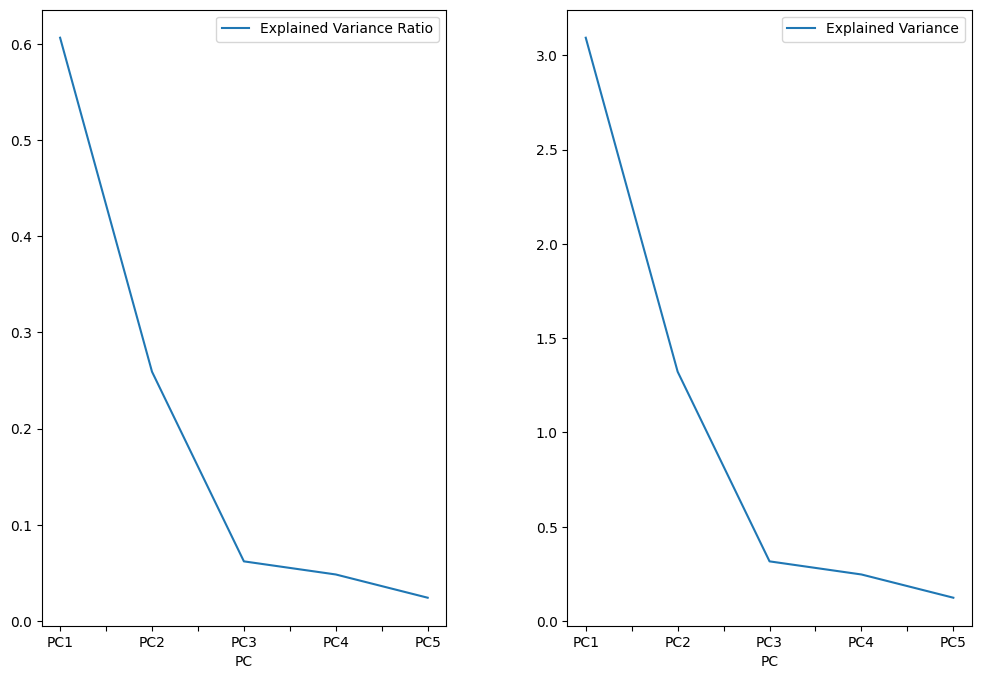

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.ravel()

food_pca_data.plot(x='PC',y='Explained Variance Ratio', ax=axs[0])
food_pca_data.plot(x='PC',y='Explained Variance', ax=axs[1])


We note that PC1 and PC2 explaines together a sigificant portion of the variance. Using he criterion, we can remove PC3-PC5. Let us look in more detail on PC1 and PC2.

In [62]:
food_pca_eigen

,PC1,PC2,PC3,PC4,PC5
Oil,-0.457533,0.370439,-0.659030,-0.467945,-0.012041
Density,0.478745,-0.356750,-0.016240,-0.718463,-0.356482
Crispy,-0.532388,-0.197661,0.178884,0.132527,-0.792421
Fracture,0.504477,0.221240,-0.542279,0.456932,-0.440116
Hardness,-0.153403,-0.804666,-0.489233,0.196184,0.226148


We can look at the data for each PC in a bar plot

<Axes: >

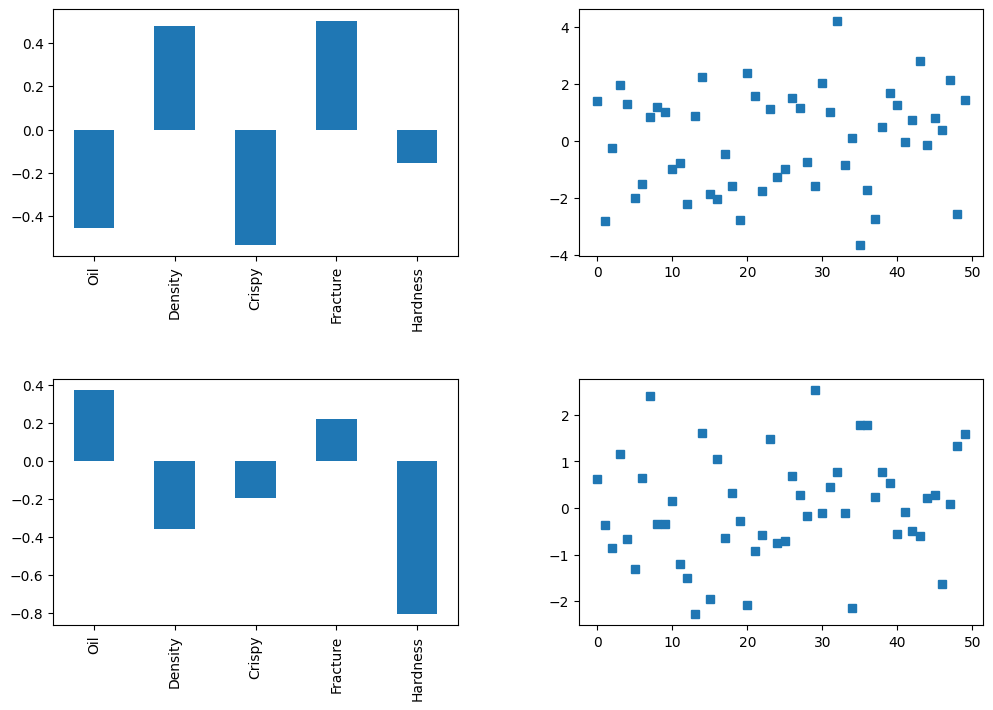

In [78]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.ravel()
food_pca_eigen['PC1'].plot.bar(ax=axs[0])
food_pca_scores['PC1'].plot(ax=axs[1], marker='s', linestyle='None')

food_pca_eigen['PC2'].plot.bar(ax=axs[2])
food_pca_scores['PC2'].plot(ax=axs[3], marker='s', linestyle='None')

Actually we can look at all at the same time:


<Axes: >

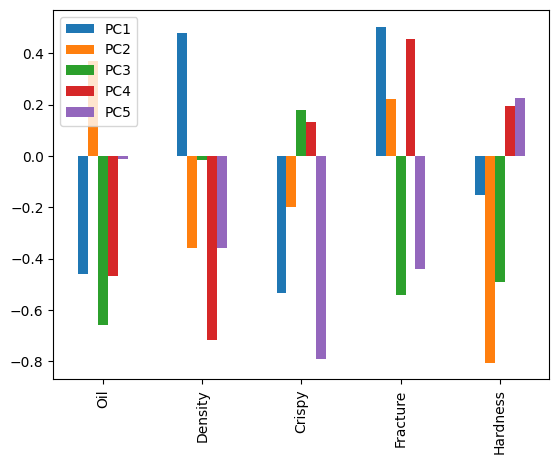

In [79]:
food_pca_eigen.plot.bar()


We can also look at the score plot plotted in the PC1-PC2 space

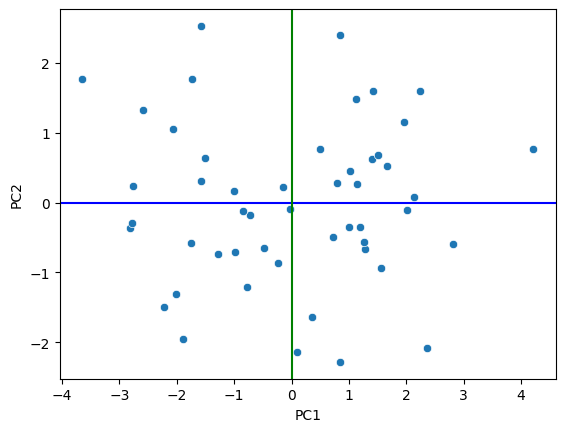

In [80]:
# Plot the scores
sns.scatterplot(data=food_pca_scores, x="PC1", y="PC2")
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.show()

- Points close the average appear at the origin of the score plot. An observation that is at the mean value for all **k**-variables will have a score vector $$z_i = [0,0,...,0].$$
- Scores further out are either outliers or naturally extreme observations.
- Original observations in **X** that are similar to each other will be similar in the score plot, while observations much further apart are dissimilar. It is much easier to detect this similarity in an **k**-dimensional space than the original **d**-dimensional space, when **d**≫**k**.

The loadings plot is a plot of the direction vectors that define the model. They show how the original variables contribute to creating the principal component.



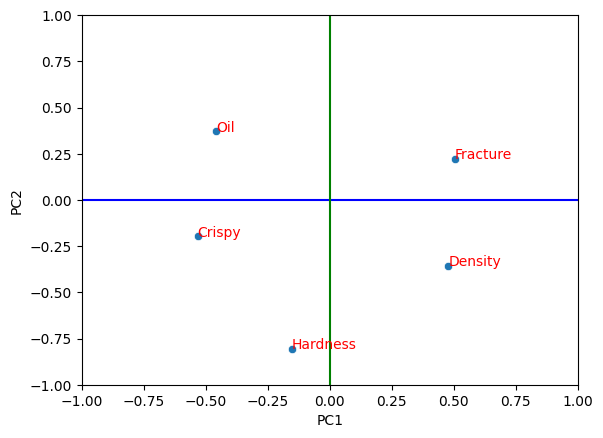

In [81]:
# Plot the loadings
sns.scatterplot(data=food_pca_eigen, x="PC1", y="PC2")
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Plot annotations
for i in range(food_pca_eigen.shape[0]):
    plt.text(
        food_pca_eigen["PC1"][i],
        food_pca_eigen["PC2"][i],
        food_pca_eigen.index[i],
        color="red",
    )

plt.show()

- Variables which have little contribution to a direction have almost zero weight in that loading.
- Variables which have roughly equal influence on defining a direction are correlated with each other and will have roughly equal numeric weights.
- Strongly correlated variables, will have approximately the same weight value when they are positively correlated. In a loadings plot of e.g. p$_1$ vs p$_2$ they will appear near each other, while negatively correlated variables will appear diagonally opposite each other.
-Signs of the loading variables are useful to compare within a direction vector; but these vectors can be rotated by 180° and still have the same interpretation.

The biplot is a very popular way for visualization of results from PCA, as it combines both the principal component scores and the loading vectors in a single biplot display.

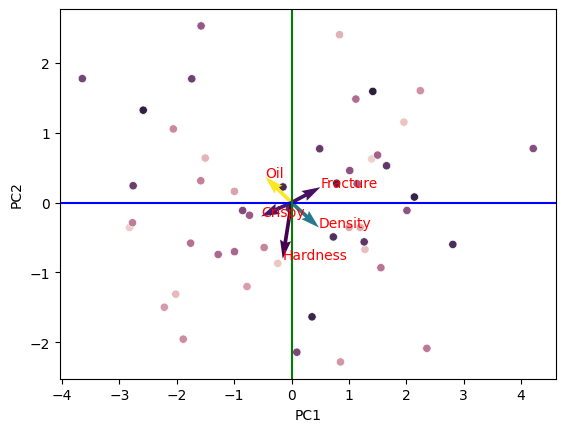

In [ ]:
# Correlation Biplot
sns.scatterplot(
    data=food_pca_scores,
    x="PC1",
    y="PC2",
    hue=food_pca_scores.index,
    legend=False,
)
plt.axhline(0, color="blue")
plt.axvline(0, color="green")

# plot the variables as vectors
plt.quiver(
    np.zeros(food_pca_eigen.shape[0]),
    np.zeros(food_pca_eigen.shape[0]),
    food_pca_eigen["PC1"],
    food_pca_eigen["PC2"],
    food_pca_eigen["eigenvalue"],
    angles="xy",
    scale_units="xy",
    scale=1,
)

# Plot annotations
for i in range(food_pca_eigen.shape[0]):
    plt.text(
        food_pca_eigen["PC1"][i],
        food_pca_eigen["PC2"][i],
        food_pca_eigen.index[i],
        color="red",
    )

The plot shows the observations as points in the plane formed by two principal components (synthetic variables). Like for any scatterplot we may look for patterns, clusters, and outliers.

In addition to the observations the plot shows the original variables as vectors (arrows). They begin at the origin [0,0] and extend to coordinates given by the loading vector (see loading plot above). These vectors can be interpreted in three ways:

- The orientation (direction) of the vector, with respect to the principal component space, in particular, its angle with the principal component axes: the more parallel to a principal component axis is a vector, the more it contributes only to that PC.
- The length in the space; the longer the vector, the more variability of this variable is represented by the two displayed principal components; short vectors are thus better represented in other dimension.
- The angles between vectors of different variables show their correlation in this space: small angles represent high positive correlation, right angles represent lack of correlation, opposite angles represent high negative correlation.